### Setting paths and imports

In [1]:
import sys
import os
import pandas as pd

module_path = os.path.abspath(os.path.join('..'))
sys.path.append(module_path)
module_path

'/NFSHOME/mprado/AIIM/GRETEL/main/GRETEL'

In [2]:
os.chdir(module_path)

In [6]:
# from src.evaluation.evaluator_manager import EvaluatorManager
# from src.evaluation.future.evaluator_manager_do import EvaluatorManager as PairedEvaluatorManager
from src.utils.context import Context
from src.data_analysis.future.data_analyzer_max import DataAnalyzer as data_analyzer

from src.evaluation.future.evaluator_manager_triplets import EvaluatorManager

In [4]:
config_f_name = 'ensembles/triplets/TCR-TCO/E10-TCR-128-28-0.25_TCO_Ensemble-Bidirectional.jsonc'

### Evaluating the explainer

In [5]:
config_path = os.path.join(module_path, 'lab', 'config', config_f_name)
runno = 1
    
print(f"Generating context for: {config_path}")
context = Context.get_context(config_path)
context.run_number = runno

context.logger.info(f"Executing: {context.config_file} Run: {context.run_number}")
context.logger.info("Creating the evaluation manager....................................")

context.logger.info("Creating the evaluators......................................................")
eval_manager = EvaluatorManager(context)

context.logger.info(
    "Evaluating the explainers............................................................."
)
eval_manager.evaluate()

Generating context for: /NFSHOME/mprado/AIIM/GRETEL/main/GRETEL/lab/config/ensembles/triplets/TCR-TCO/E10-TCR-128-28-0.25_TCO_Ensemble-Bidirectional.jsonc
2024-07-22 17:33:55,-619450429 | INFO | 1243808 - Executing: /NFSHOME/mprado/AIIM/GRETEL/main/GRETEL/lab/config/ensembles/triplets/TCR-TCO/E10-TCR-128-28-0.25_TCO_Ensemble-Bidirectional.jsonc Run: 1
2024-07-22 17:33:55,-619450413 | INFO | 1243808 - Creating the evaluation manager....................................
2024-07-22 17:33:55,-619450397 | INFO | 1243808 - Creating the evaluators......................................................
2024-07-22 17:33:55,-619450192 | INFO | 1243808 - Loading: TreeCyclesRand-266bb3721206805597afc8c4184fe0ab
2024-07-22 17:33:55,-619450116 | INFO | 1243808 - Created: TreeCyclesRand-266bb3721206805597afc8c4184fe0ab
2024-07-22 17:33:55,-619450006 | INFO | 1243808 - Creating: TreeCyclesOracle-8f8e216deff127e0218ff13e1490c1a2
2024-07-22 17:33:55,-619449989 | INFO | 1243808 - TreeCyclesOracle trained i

/NFSHOME/mprado/AIIM/GRETEL/main/GRETEL/src/explainer/generative/gans/graph/res_gen.py:64: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matrices or `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3571.)
  edge_weights = torch.add(edge_weights, rebuild_adj_matrix(len(node_features), edge_list, edge_attr.T, self.device))


2024-07-22 17:34:02,-619443343 | INFO | 1243808 - The counterfactual for 0 was reduced
2024-07-22 17:34:03,-619442507 | INFO | 1243808 - The counterfactual for 64 was reduced
2024-07-22 17:34:03,-619442414 | INFO | 1243808 - evaluated instance with id 0
2024-07-22 17:34:03,-619442412 | INFO | 1243808 - Evaluating instance with id 1
2024-07-22 17:34:39,-619406087 | INFO | 1243808 - The counterfactual for 108 was reduced
2024-07-22 17:34:39,-619406063 | INFO | 1243808 - The counterfactual for 108 was reduced
2024-07-22 17:34:39,-619405954 | INFO | 1243808 - evaluated instance with id 1
2024-07-22 17:34:39,-619405953 | INFO | 1243808 - Evaluating instance with id 2
2024-07-22 17:34:40,-619405379 | INFO | 1243808 - The counterfactual for 2 was reduced
2024-07-22 17:34:40,-619404784 | INFO | 1243808 - The counterfactual for 70 was reduced
2024-07-22 17:34:40,-619404737 | INFO | 1243808 - The counterfactual for 70 was reduced
2024-07-22 17:34:41,-619404630 | INFO | 1243808 - evaluated instan

In [6]:
ev = eval_manager.evaluators[0]

In [8]:
for exp in ev.explanations:
    print(exp.input_instance.id,exp.counterfactual_instances[0].id)

0 0
1 1
2 2
3 3
4 4
5 5
6 6
7 7
8 8
9 9
10 10
11 11
12 12
13 13
14 14
15 15
16 16
17 17
18 18
19 19
20 20
21 21
22 22
23 23
24 24
25 25
26 26
27 27
28 28
29 29
30 30
31 31
32 32
33 33
34 34
35 35
36 36
37 37
38 38
39 39
40 40
41 41
42 42
43 43
44 44
45 45
46 46
47 47
48 48
49 49
50 50
51 51
52 52
53 53
54 54
55 55
56 56
57 57
58 58
59 59
60 60
61 61
62 62
63 63
64 64
65 65
66 66
67 67
68 68
69 69
70 70
71 71
72 72
73 73
74 74
75 75
76 76
77 77
78 78
79 79
80 80
81 81
82 82
83 83
84 84
85 85
86 86
87 87
88 88
89 89
90 90
91 91
92 92
93 93
94 94
95 95
96 96
97 97
98 98
99 99
100 100
101 101
102 102
103 103
104 104
105 105
106 106
107 107
108 108
109 109
110 110
111 111
112 112
113 113
114 114
115 115
116 116
117 117
118 118
119 119
120 120
121 121
122 122
123 123
124 124
125 125
126 126
127 127


### Aggregating the stats

In [8]:
results_path = os.path.join(module_path, 'lab', 'output', 'results')
stats_file_path = os.path.join(module_path, 'lab', 'stats', 'results.csv')
res = data_analyzer.create_aggregated_dataframe(results_path)
res.to_csv(stats_file_path)
res

,scope,dataset,oracle,explainer,Runtime,Runtime-std,GraphEditDistance,GraphEditDistance-std,Correctness,Correctness-std,OracleCalls,OracleCalls-std,OracleAccuracy,OracleAccuracy-std,Sparsity,Sparsity-std,Fidelity,Fidelity-std,Instability,Instability-std
0,ensembles,TreeCyclesRand-266bb3721206805597afc8c4184fe0ab,TreeCyclesOracle-8f8e216deff127e0218ff13e1490c1a2,ExplanationBidirectionalSearch,8.918608,0.0,1.181102,0.0,0.992188,0.0,850.90625,0.0,1.0,0.0,0.028165,0.0,0.992188,0.0,1.017816,0.0


### Visualizing individual instances

In [7]:
evaluator = eval_manager.evaluators[0]
evaluator

In [1]:
exp = evaluator.explanations[2]
og_inst = exp.input_instance
cf_inst = exp.counterfactual_instances[0]

NameError: name 'evaluator' is not defined

In [9]:

changes = data_analyzer.get_cf_changes(og_inst, cf_inst, False)

In [10]:
common_edges = changes['common edges']
added_edges = changes['added edges']
removed_edges = changes['removed edges']
common_nodes = changes['common nodes']
added_nodes = changes['added nodes']
removed_nodes = changes['removed nodes']

print(f'added edges: {added_edges}')
print(f'removed_edges: {removed_edges}')
print(f'added nodes: {added_nodes}')
print(f'removed nodes: {removed_nodes}')

added edges: []
removed_edges: [(24, 25)]
added nodes: []
removed nodes: []


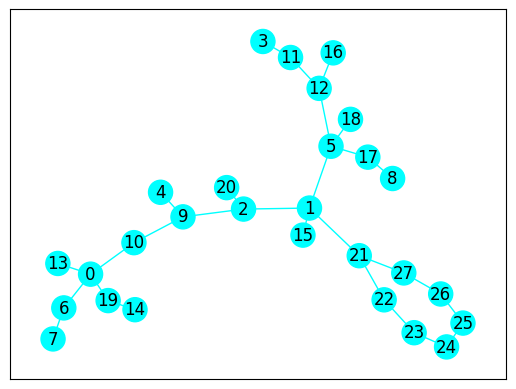

In [14]:
pos = data_analyzer.draw_graph(og_inst)

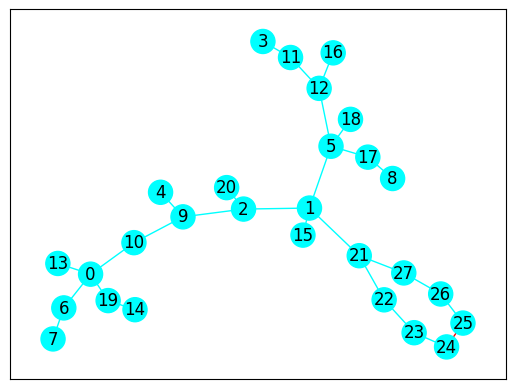

In [15]:
data_analyzer.draw_counterfactual_actions(og_inst, cf_inst, position=pos)